# Laboratory 1 - Basic Operations, Gradient, Binary Images, Morphology

The goal of Laboratory 1 is to:
<ol>
  <li> Get familiar with basic input/output operations for 2-D images.
  <li> Implement basic functions using NumPy arrays (gradient of a 2-D image).
  <li> Get familiar with binary images and morphology operations.
  <li> Implement basic morphology operations: erosion, dilation, opening, closing.
</ol>


### Part I - Input/Output

Let's start with loading an exemplary 2-D image. The image is named "xray.jpg" and should be placed in the "Files" folder (/content).

However, the first thing to do is to load the necessary libraries.

In [3]:
import numpy as np # Basic interface in Python to N-dimensional arrays
from PIL import Image # Tool to load basic 2-D images
import matplotlib.pyplot as plt # Basic visualization for 1-D plots and 2-D images / data
import scipy.ndimage as nd # Useful functions to process N-dimensional arrays
# (e.g. morpohology operations for N-D images)
%matplotlib inline
# Jupyter specific command to directly show the visualizations

After importing the libraries - let's go into loading the exemplary "xray.jpg" and showing it using matplotlib.

Image shape: (598, 282)
Image dtype: uint8


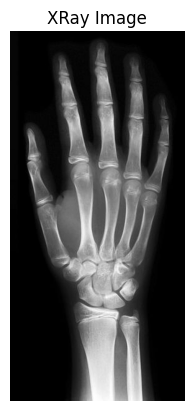

In [ ]:
image = Image.open("xray.jpg")
image = np.array(image) # Convert the image to NumPy array
print(f"Image shape: {image.shape}") 
print(f"Image dtype: {image.dtype}")

plt.figure(dpi=100)
plt.imshow(image, cmap='gray') # Show the image in grayscale
plt.axis('off') # Turn off the axis
plt.title("XRay Image")
plt.show()

### Part II - Calculating Image Gradient

The next task is to calculate the image gradient using a **np.gradient** function within NumPy.

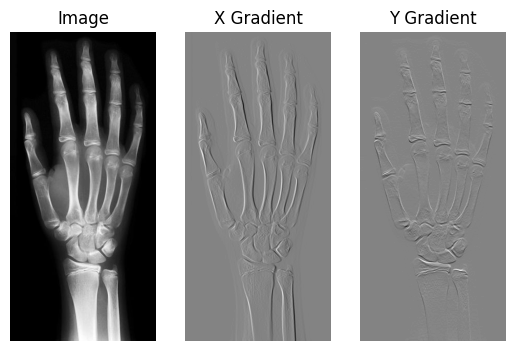

In [ ]:
row_gradient, col_gradient = np.gradient(image) # TODO - use the np.gradient function to calculate the gradient

plt.figure(dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 3, 2)
plt.imshow(col_gradient, cmap='gray')
plt.axis('off')
plt.title("X Gradient")
plt.subplot(1, 3, 3)
plt.imshow(row_gradient, cmap='gray')
plt.axis('off')
plt.title("Y Gradient")
plt.show()


One can observe that the gradient shows the regions of intensity changes with respect to a given direction. Calculating image (in general any N-dimensional function) gradient is a basic building block for numerous image processing tasks.

The next task is to define and implement a function called **our_gradient** that implements the same functionality as the **np.gradient** function. The result of the **our_gradient** function should be the same as of the **np.gradient**.

The function should implement the central differences:
$$ \frac{\partial f(x, y)}{\partial x} = \frac{f(x + 1, y) -  f(x - 1, y)}{2}$$
$$ \frac{\partial f(x, y)}{\partial y} = \frac{f(x, y + 1) -  f(x, y - 1)}{2}$$
, for each pair __(x, y)__ defining the 2-D image (hint: double for loop or proper array slicing/indexing).

In [ ]:
def our_gradient(image):
  row_gradient = np.array([])
  col_gradient = np.array([])
  x,y = np.shape(image)
  data = np.asarray(image)
  for i in range(x):
    for j in range(y):
      if(i==0):
         tempx = (data[x+1,y] - data[0,y])/2 
         tempy = (data[x,y+1] - data[x,y-1])/2 
         np.append(tempx,row_gradient)
         np.append(tempy,col_gradient)
      if(j==0):
         tempx = (data[x+1,y] - data[x+1,y])/2 
         tempy = (data[x,y+1] - data[x,0])/2 
         np.append(tempx,row_gradient)
         np.append(tempy,col_gradient)
      if(i==x-1):
         tempx = (data[0,y] - data[x-1,y])/2 
         tempy = (data[x,y+1] - data[x,y-1])/2 
         np.append(tempx,row_gradient)
         np.append(tempy,col_gradient)
      if(j==y-1):
         tempx = (data[x+1,y] - data[x-1,y])/2 
         tempy = (data[x,0] - data[x,y-1])/2 
         np.append(tempx,row_gradient)
         np.append(tempy,col_gradient)
      else:
          tempx = (data[x+1,y] - data[x-1,y])/2 
          tempy = (data[x,y+1] - data[x,y-1])/2 
          np.append(tempx,row_gradient)
          np.append(tempy,col_gradient)

  row_gradient = np.reshape(row_gradient,np.shape(image))
  col_gradient = np.reshape(col_gradient,np.shape(image))
  return row_gradient, col_gradient

Test whether the proposed function works correctly:

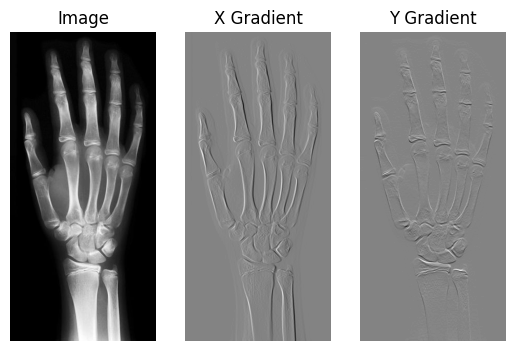

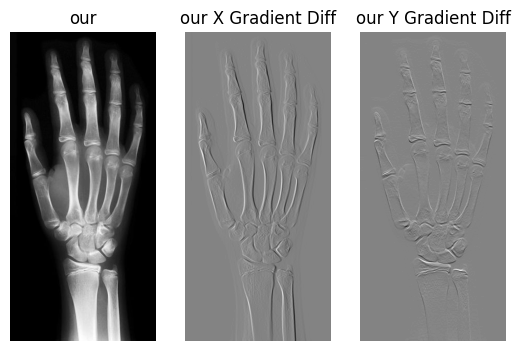

In [ ]:
our_row_gradient, our_col_gradient = np.gradient(image)

# Again show the results - this time using the implemented function

plt.figure(dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 3, 2)
plt.imshow(col_gradient, cmap='gray')
plt.axis('off')
plt.title("X Gradient")
plt.subplot(1, 3, 3)
plt.imshow(row_gradient, cmap='gray')
plt.axis('off')
plt.title("Y Gradient")
plt.show()
# Show difference images

plt.figure(dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray') # TODO
plt.axis('off')
plt.title("our")
plt.subplot(1, 3, 2)
plt.imshow(our_col_gradient, cmap='gray') # TODO
plt.axis('off')
plt.title("our X Gradient Diff")
plt.subplot(1, 3, 3)
plt.imshow(our_row_gradient, cmap='gray') # TODO
plt.axis('off')
plt.title("our Y Gradient Diff")
plt.show()

Moreover, perform a quantitative test by calculating the mean squared error (MSE) between the NumPy function and the implemented function:

In [4]:
# Calculate the mean squared error between NumPy function and the implemented function

mse = lambda a, b: np.mean((np.square(a - b))) # TODO - implement the mean squared error as lambda expression
print(f"MSE between row gradients: {mse(row_gradient, our_row_gradient)}")
print(f"MSE between column gradients: {mse(col_gradient, our_col_gradient)}")

NameError: ignored

### Part III - Binary Images

The next part is dedicated to binary images.

Binary images contain only two discrete values (e.g. True/False, 0/1, 0/255). They are a special kind of images that are often a result of the image processing/analysis pipeline (e.g. binary segmentation of a tumor).

Let's start with defining two functions generating synethetic binary images - circle and rectangle.

In [58]:
import math
def generate_ciricle(x_size, y_size, x_origin, y_origin, radius):
	arr = np.zeros((x_size,y_size))
	for angle in np.arange(0, 2 * np.pi, 1/2/radius):
		x = int(radius-1 + radius * np.cos(angle))
		y = int(radius-1 + radius * np.sin(angle))
		arr[x,y] = 1
	mask = arr.cumsum(0)==1
	arr[mask] = 1
	return arr
def generate_rectangle(x_size, y_size, x_b, y_b, width, height):
	arr = np.zeros((x_size,y_size))
	start_row = x_b
	start_column = start_row
	end_row = height + start_row
	end_row = end_row if end_row <= arr[0] else arr[0]
	end_column = width + start_column
	end_column = end_column if end_column <= arr[1] else arr[1]
	return arr

Let's try to use these functions to generate exemplary circle and rectangle.

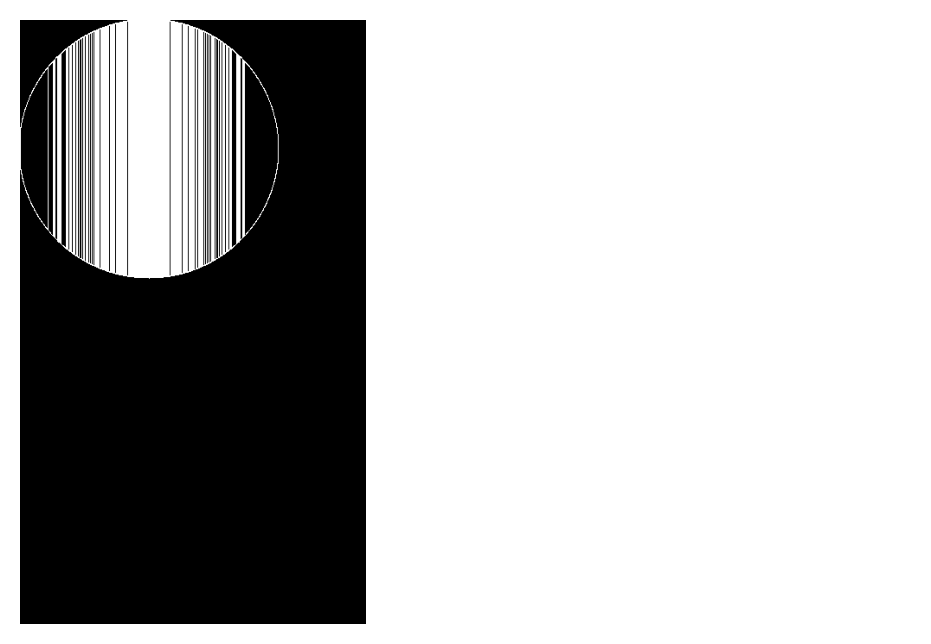

In [60]:
x_size, y_size = 700, 400
x_origin, y_origin = 300, 200
radius = 150
x_b, y_b =  100, 150
width, height = 400, 150
circle = generate_ciricle(x_size, y_size, x_origin, y_origin, radius)
# rectangle = generate_rectangle(x_size, y_size, x_b, y_b, width, height)
plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
# plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

Both the circle are sucessfully generated. Let's add a bit of binary noise now - it will be useful in the next part of the notebook.

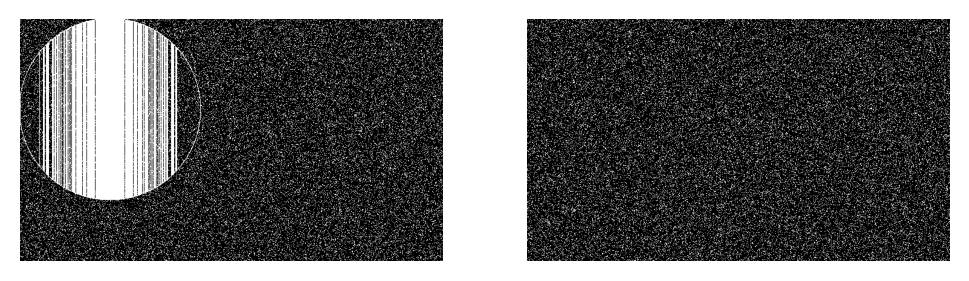

In [36]:
circle = np.logical_or(circle, np.abs(np.random.randn(y_size, x_size)) > 1.5)
rectangle = np.logical_or(rectangle, np.abs(np.random.randn(y_size, x_size)) > 1.5)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

### Part IV - Morphological Operations

The most commonly used morphological operatons are:
<ol>
  <li> Erosion
  <li> Dilation
  <li> Opening (erosion followed by dilation)
  <li> Closing (dilation followed by erosion)
</ol>

They are common pre- or post-processing steps for binary images.

For a good description of morphological operations please visit: 
<ol>
 <li> https://en.wikipedia.org/wiki/Erosion_(morphology)
 <li> https://en.wikipedia.org/wiki/Dilation_(morphology)
 <li> https://en.wikipedia.org/wiki/Opening_(morphology)
 <li> https://en.wikipedia.org/wiki/Closing_(morphology)
</ol>

In this part you are going to use the function available in the SciPy library and then implement your own with similiar behavior.

Let's start with using the SciPy functions.

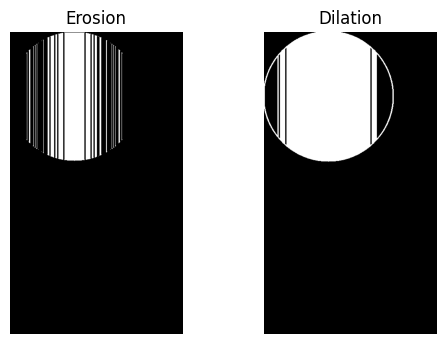

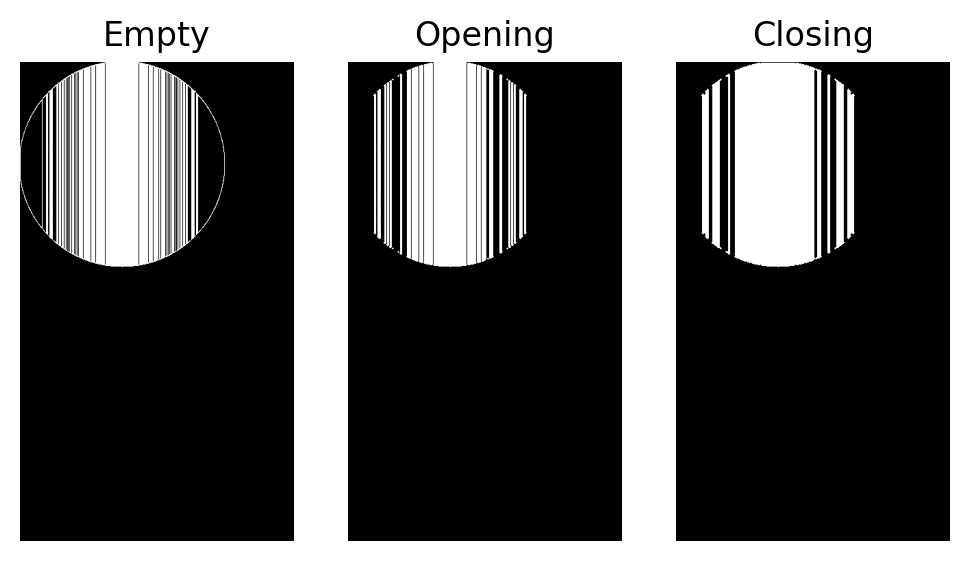

In [61]:
eroded_circle1 = nd.binary_erosion(circle) # TODO - perform binary erosion on the circle using SciPy
dilated_circle1 = nd.binary_dilation(circle) # TODO - perform binary dilation on the circle using SciPy

inner_circle = generate_ciricle(x_size, y_size, x_origin, y_origin, 10)
empty_circle1 = np.logical_and(circle, np.logical_not(inner_circle)) # Create a circle with a hole
opened_circle1 = nd.binary_opening(empty_circle1) # TODO - perform binary opening on the "empty_circle" using SciPy
closed_opened_circle1 = nd.binary_closing(opened_circle1) # TODO - perform binary erosion on result of previous step using SciPy

plt.figure(dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(eroded_circle1, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Erosion")
plt.subplot(1, 2, 2)
plt.imshow(dilated_circle1, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilation")
plt.show()

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(empty_circle1, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Empty")
plt.subplot(1, 3, 2)
plt.imshow(opened_circle1, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Opening")
plt.subplot(1, 3, 3)
plt.imshow(closed_opened_circle1, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Closing")
plt.show()

Now implement your own functions, performing the same operations.

In [64]:
def erosion(image, se):
	return None # TODO

def dilation(image, se):
	return None # TODO

def opening(image, se):
	return None # TODO

def closing(image, se):
	return None # TODO

Test whether the implemented functions work correctly:

In [65]:
eroded_circle = erosion(circle) # TODO - perform binary erosion on the circle using the implemented function
dilated_circle = dilation(circle) # TODO - perform binary dilation on the circle using the implemented function

inner_circle = generate_ciricle(x_size, y_size, x_origin, y_origin, 10)
empty_circle = np.logical_and(circle, np.logical_not(inner_circle)) # Create a circle with a hole
opened_circle = opening(circle) # TODO - perform binary opening on the "empty_circle" using the implemented function
closed_opened_circle = closing(opened_circle) # TODO - perform binary erosion on result of previous step using the implemented function

plt.figure(dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(eroded_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Erosion")
plt.subplot(1, 2, 2)
plt.imshow(eroded_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilation")
plt.show()

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(empty_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Empty")
plt.subplot(1, 3, 2)
plt.imshow(opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Opening")
plt.subplot(1, 3, 3)
plt.imshow(closed_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Closing")
plt.show()

TypeError: ignored

And also check the results quantitatively:

In [ ]:
print(f"MSE between erosions: {None}") # TODO - calculate mse
print(f"MSE between dilations: {None}") # TODO - calculate mse
print(f"MSE between closing results: {None}") # TODO - calculate mse
print(f"MSE between opening results: {None}") # TODO - calculate mse

MSE between erosions: 0.0
MSE between dilations: 0.0
MSE between closing results: 0.0
MSE between opening results: 0.0


### Conclusion

This is the end of Laboratory 1. You should be now familiar with:
<ol>
  <li> Loading 2-D images using PIL library.
  <li> Generating synthetic 2-D images.
  <li> Implementing basic functions like gradient calculation or morphology operations.
</ol>

The next laboratory will discuss the convolution/correlation operators and how to implement basic neural networks in PyTorch.